In [1]:
import numpy as np
import scipy as sp
import xbout
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys

from hwtools import HWcase, constants

%load_ext autoreload
%autoreload 2

# Cases and setup

## Process inputs
The cases are all set up using roughly MAST-U relevant parameters.
For consistency with Gheorghiu 2023, the following parameters are constant:
- kappa (drive) is 0.2, corresponding to a lambda_n of 6.462e-3
- T0 is 40eV
- B is 0.5T
- Diffusion is 1e-4 on both the vorticity and density equations

Density is varied to achieve different values of alpha, the coupling (damping) parameter. To compare with literature which is mostly for 2D models, you have to multiply the alpha parameter by k**2, where k is the parallel wavenumber which we take as the one corresponding to the largest system wavelength (i.e. k = 2pi/Lpar). In this notebook, this corresponds to "2dAlpha". The cases span 2D equivalent alphas of 1e-3, 1e-1 and 1.

## Geometry, timestep and and BCs
The domain is now 64x64x64. X is the radial, Y the parallel and Z the binormal direction. The cell widths are 2.585e-4, 1.562e-1 and 2.585e-4 metres in the X, Y and Z directions respectively. This makes the domain quite narrow in the X and Z (16.3mm) but long in the Y direction (10m including guard cells). In the X direction the walls have a dirichlet(0) boundary condition on both equations, while Y and Z are periodic. The cases were run with a timestep of 1us for 500 timesteps. Note that our CVODE solver uses an adaptive timestepper, so this is just an output timestep and does not correspond to the solver timestep.

## Impact of alpha

 Higher values of alpha are associated with regimes closer to zonal flows while lower values of alpha create regimes that are more turbulent. Across all values of alpha, the 3D version of Hasegawa Wakatani seems to tend to create some sort of a zonal flow structure eventually. This has to do with the extension of the model into the parallel direction allowing the existence of a mode which doesn't get damped (still trying to understand this better). The end effect is that it behaves closer to a modified than classical HW system. A modified HW system is where the zonal component is explicitly left undamped.




In [2]:
toload = [
    dict(name = "2dAlpha_1e-1", path = r"D:\hwcases\hwC-2a_a2d1e-1_k0.2_L10", T0 = 40, n0 = 1.59e+19, lambda_n = 0.006462),
    dict(name = "2dAlpha_1e+0", path = r"D:\hwcases\hwC-2c_a2d1e0_k0.2_L10", T0 = 40, n0 = 1.45e+18, lambda_n = 0.006462),
    dict(name = "2dAlpha_1e+1", path = r"D:\hwcases\hwC-2e_a2d1e1_k0.2_L10", T0 = 40, n0 = 1.235e+16, lambda_n = 0.006462)
]

cases = {}
for entry in toload:
    
    case = HWcase()
    case.load(entry["path"])
    case.set_params(T0 = entry["T0"], n0 = entry["n0"], lambda_n = entry["lambda_n"])
    case.reconstruct_x()
    case.unnormalise()
    cases[entry["name"]] = case    


- Looking for squash file
- Squash file found. squash date 02/01/2024, 12:55:22, dmp file date 01/31/2024, 18:13:50


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\geometries.py:226: UserWarning: Size of toroidal domain as calculated from nz*dz (<xarray.DataArray 'dz' ()>
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    bout_type:      Field2D
    metadata:       {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG': 2, '...
    options:        #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 * 1e-...
    geometry:        is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


Domain extents:
X: 0.0 - 16.3 mm
Y: 78.1 - 9921.9 mm
Z: 0.0 - 16.3 mm

Time simulated: 5.0e-04 s
- Looking for squash file
- Squash file found. squash date 02/01/2024, 12:56:47, dmp file date 01/31/2024, 18:17:38


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\geometries.py:226: UserWarning: Size of toroidal domain as calculated from nz*dz (<xarray.DataArray 'dz' ()>
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    bout_type:      Field2D
    metadata:       {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG': 2, '...
    options:        #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 * 1e-...
    geometry:        is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


Domain extents:
X: 0.0 - 16.3 mm
Y: 78.1 - 9921.9 mm
Z: 0.0 - 16.3 mm

Time simulated: 5.0e-04 s
- Looking for squash file
- Squash file found. squash date 02/13/2024, 13:52:37, dmp file date 02/13/2024, 11:20:46
Domain extents:
X: 0.0 - 16.3 mm
Y: 78.1 - 9921.9 mm
Z: 0.0 - 16.3 mm

Time simulated: 5.0e-04 s


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\geometries.py:226: UserWarning: Size of toroidal domain as calculated from nz*dz (<xarray.DataArray 'dz' ()>
dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    bout_type:      Field2D
    metadata:       {'BOUT_VERSION': 5.01, 'MXG': 2, 'MXSUB': 16, 'MYG': 2, '...
    options:        #\n# Hasegawa-Wakatani test case\n#\n\ntimestep = 1 * 1e-...
    geometry:        is not the same as 2pi*(ZMAX - ZMIN) (6.283185307179586): using value from dz
  warn(


# Initial conditions
Density is initialised as uniform and vorticity is initialised according to the mixmode function as per the input file:
```
scale = 0.1  # Fluctuation amplitude
function = mixmode(2*pi*x) * mixmode(z - y)  # Fluctuation function
```
mixmode represents a mixture of Fourier modes, see BOUT++ docs for the expression:
https://bout-dev.readthedocs.io/en/stable/user_docs/variable_init.html#expressions

X, Y and Z in the input file are defined as:
- X: position between 0 and 1
- Y: position between 0 and 2pi
- Z: position between 0 and 2pi

In [54]:
m["n0"] * constants("qe")

2.5474608258

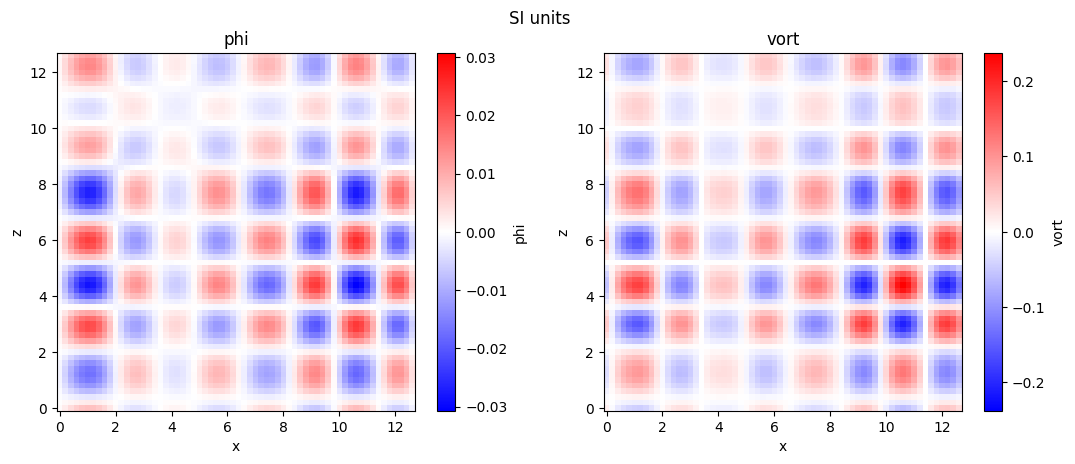

In [74]:

name = "2dAlpha_1e-1"
ds = cases[name].ds.isel(y=32, t = 0)
m = ds.metadata

fig, axes = plt.subplots(1, 2, figsize = (11,4.5))
fig.suptitle("SI units")


cmap = "bwr"
(ds["phi"] ).plot(ax = axes[0],  cmap = cmap, x = "x", y = "z")
(ds["vort"] ).plot(ax = axes[1],  cmap = cmap, x = "x", y = "z")

axes[0].set_title("phi")
axes[1].set_title("vort")
    
for ax in axes:
    ax.set_aspect("equal")


fig.tight_layout()


## Performance

2dAlpha values of 1e-3 and 1e-1 took about a minute on 32 cores across two Viking2 nodes. The 2dAlpha=1 case took about 4 minutes. A benchmark on CSD3 will be done later.
- The CVODE solver doesn't allow the user to postprocess all solver timesteps - only the last solver timestep done in an individual output timestep is saved. This figure is shown below.

Text(0.5, 0, 'Simulation time [us]')

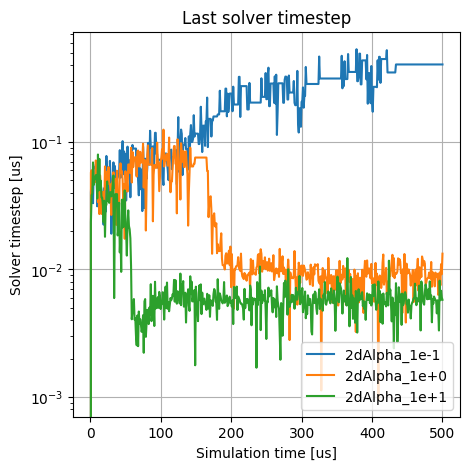

In [77]:
fig, ax = plt.subplots(1, dpi = 100, figsize = (5,5))


for name in cases:
    ds = cases[name].ds
    ax.plot(ds["t"] * 1e6, ds["cvode_last_step"] / ds.metadata["Omega_ci"] * 1e6, label = name)
    # /axes[1].plot(ds["t"] * 1e6, ds["wtime"])
    
ax.set_title("Last solver timestep")
ax.set_ylabel("Solver timestep [us]")

ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("Simulation time [us]")



### Benchmarks on CSD3

(0.0, 35.0)

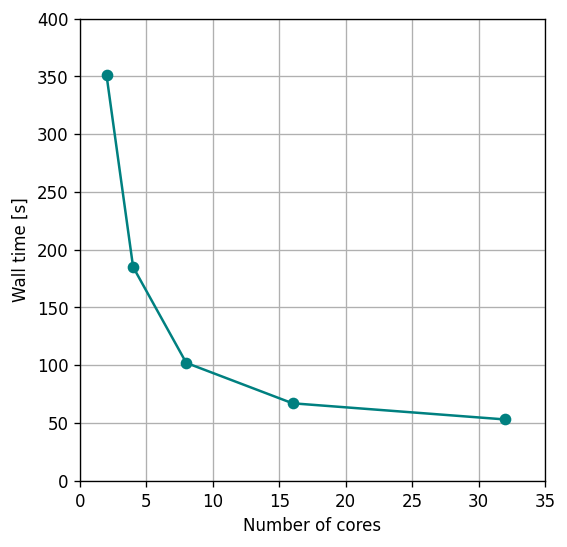

In [42]:
fig, ax = plt.subplots(dpi = 120, figsize = (5,5))

cores = [32, 16, 8, 4, 2]
times = [53, 67, 60+42, 3*60+5, 5*60+51]

ax.plot(cores, times, color = "teal", marker = "o")
ax.set_xlabel("Number of cores")
ax.set_ylabel("Wall time [s]")
ax.grid()
ax.set_ylim(0,400)
ax.set_xlim(0,35)

# RMS fluctuation history

Text(0, 0.5, 'Normalised RMS')

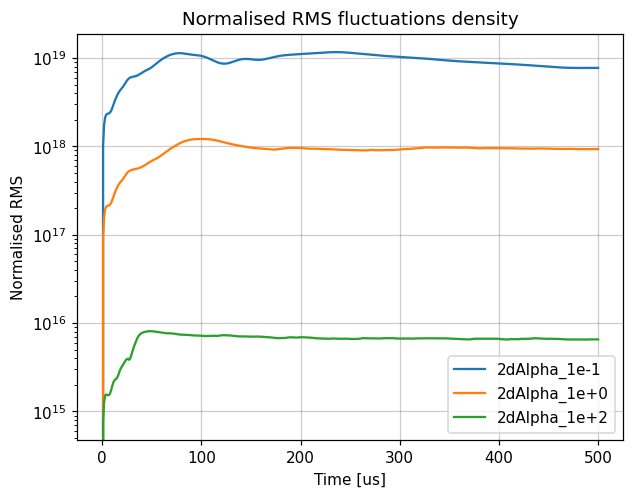

In [42]:
### Plot
fig, ax = plt.subplots(dpi = 110)

for case in cases:
    ds = cases[case].ds
    

    ### Calculate RMS of fluctuations

    def get_scaled_rms(da):
        """
        Calculate root mean square of a DataArray
        """
        diff = da.diff("t")
        fractional_diff = diff 
        # rms = np.sqrt((fractional_diff**2).mean(["x", "y", "z"]))
        rms = np.sqrt((da**2).mean(["x", "y", "z"]))
        return rms
        # return rms / rms.max()

    t = ds["t"] * 1e6
    ax.plot(t, get_scaled_rms(ds["n"]), label = case)
    # get_scaled_rms(ds["vort"]).plot(ax = ax, label = "Vorticity", color = "darkorange")
    # get_scaled_rms(ds["phi"]).plot(ax = ax, label = "Potential", color = "firebrick")

ax.set_title(f"Normalised RMS fluctuations density")
ax.grid(c = "k", alpha = 0.2)
ax.set_yscale("log")
ax.legend()
ax.set_xlabel("Time [us]")
ax.set_ylabel("Normalised RMS")

# Energy and enstrophy plots
- Taken from Karsholm 1999 and made into SI units

In [3]:
for case in cases:
    cases[case].calculate_energy_enstrophy()

Text(0, 0.5, '$C^{2}\\/m^{-3}$')

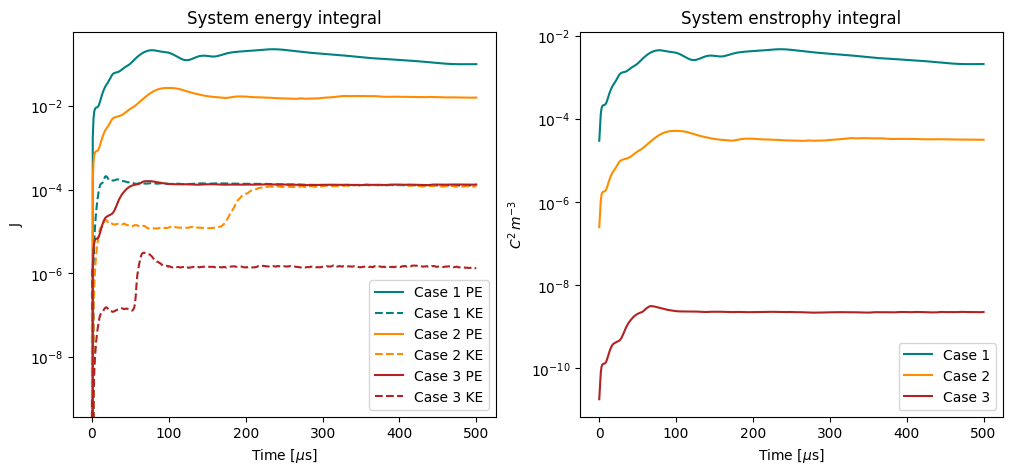

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

colors = ["teal", "darkorange", "firebrick"]

ax = axes[0]
for i, name in enumerate(cases):
    ds = cases[name].ds

    ax.plot(ds["t"] * 1e6, ds["PE"], label = f"Case {i+1} PE", c = colors[i], ls = "-")
    ax.plot(ds["t"] * 1e6, ds["KE"], label = f"Case {i+1} KE", c = colors[i], ls = "--")
    
    

ax.set_ylabel("J")

ax.set_title("System energy integral")
    

ax = axes[1]
for i, name in enumerate(cases):
    ds = cases[name].ds

    ax.plot(ds["t"] * 1e6, ds["W"], label = f"Case {i+1}", c = colors[i], ls = "-")
    
for ax in axes:
    ax.set_xlabel(r"Time [$\mu$s]")
    ax.legend()
    ax.set_yscale("log")
    
ax.set_title("System enstrophy integral")
ax.set_ylabel("$C^{2}\/m^{-3}$")

# Density fluctuation spectrum
- Only done for the 1e-1 case for now

In [14]:
f = {}
ps = {}

for name in cases:
    f[name], ps[name] = cases[name].calculate_spectrum("n", sample_rate = 1e6)
    print(name)

2dAlpha_1e-1
2dAlpha_1e+0
2dAlpha_1e+1


In [21]:
f[name]

array([0.        , 0.00990099, 0.01980198, 0.02970297, 0.03960396,
       0.04950495, 0.05940594, 0.06930693, 0.07920792, 0.08910891,
       0.0990099 , 0.10891089, 0.11881188, 0.12871287, 0.13861386,
       0.14851485, 0.15841584, 0.16831683, 0.17821782, 0.18811881,
       0.1980198 , 0.20792079, 0.21782178, 0.22772277, 0.23762376,
       0.24752475, 0.25742574, 0.26732673, 0.27722772, 0.28712871,
       0.2970297 , 0.30693069, 0.31683168, 0.32673267, 0.33663366,
       0.34653465, 0.35643564, 0.36633663, 0.37623762, 0.38613861,
       0.3960396 , 0.40594059, 0.41584158, 0.42574257, 0.43564356,
       0.44554455, 0.45544554, 0.46534654, 0.47524753, 0.48514852,
       0.49504951])

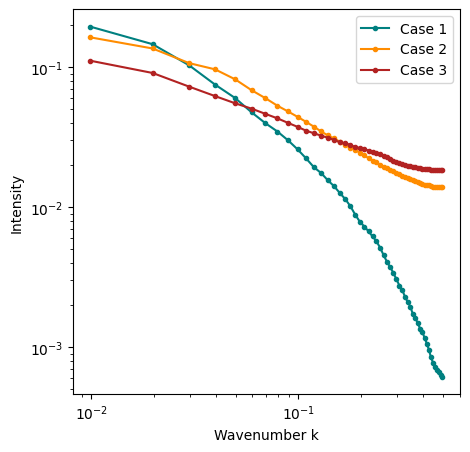

In [25]:
fig, ax = plt.subplots(figsize = (5,5), dpi = 100)
colors = ["teal", "darkorange", "firebrick"]

for i, name in enumerate(cases):
    ax.plot(f[name][1:], ps[name][1:], marker = "o", ms = 3, label = f"Case {i+1}", color = colors[i])
    

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Wavenumber k")
ax.set_ylabel("Intensity")

ax.legend()

# Timeslices of density
- It looks like the 2dAlpha=1e-1 and 1e-3 are quite similar while 1e0 is distinct. All show both turbulent and zonal features which become more zonal as the simulation progresses.
- Probably worth running one at a higher alpha number.

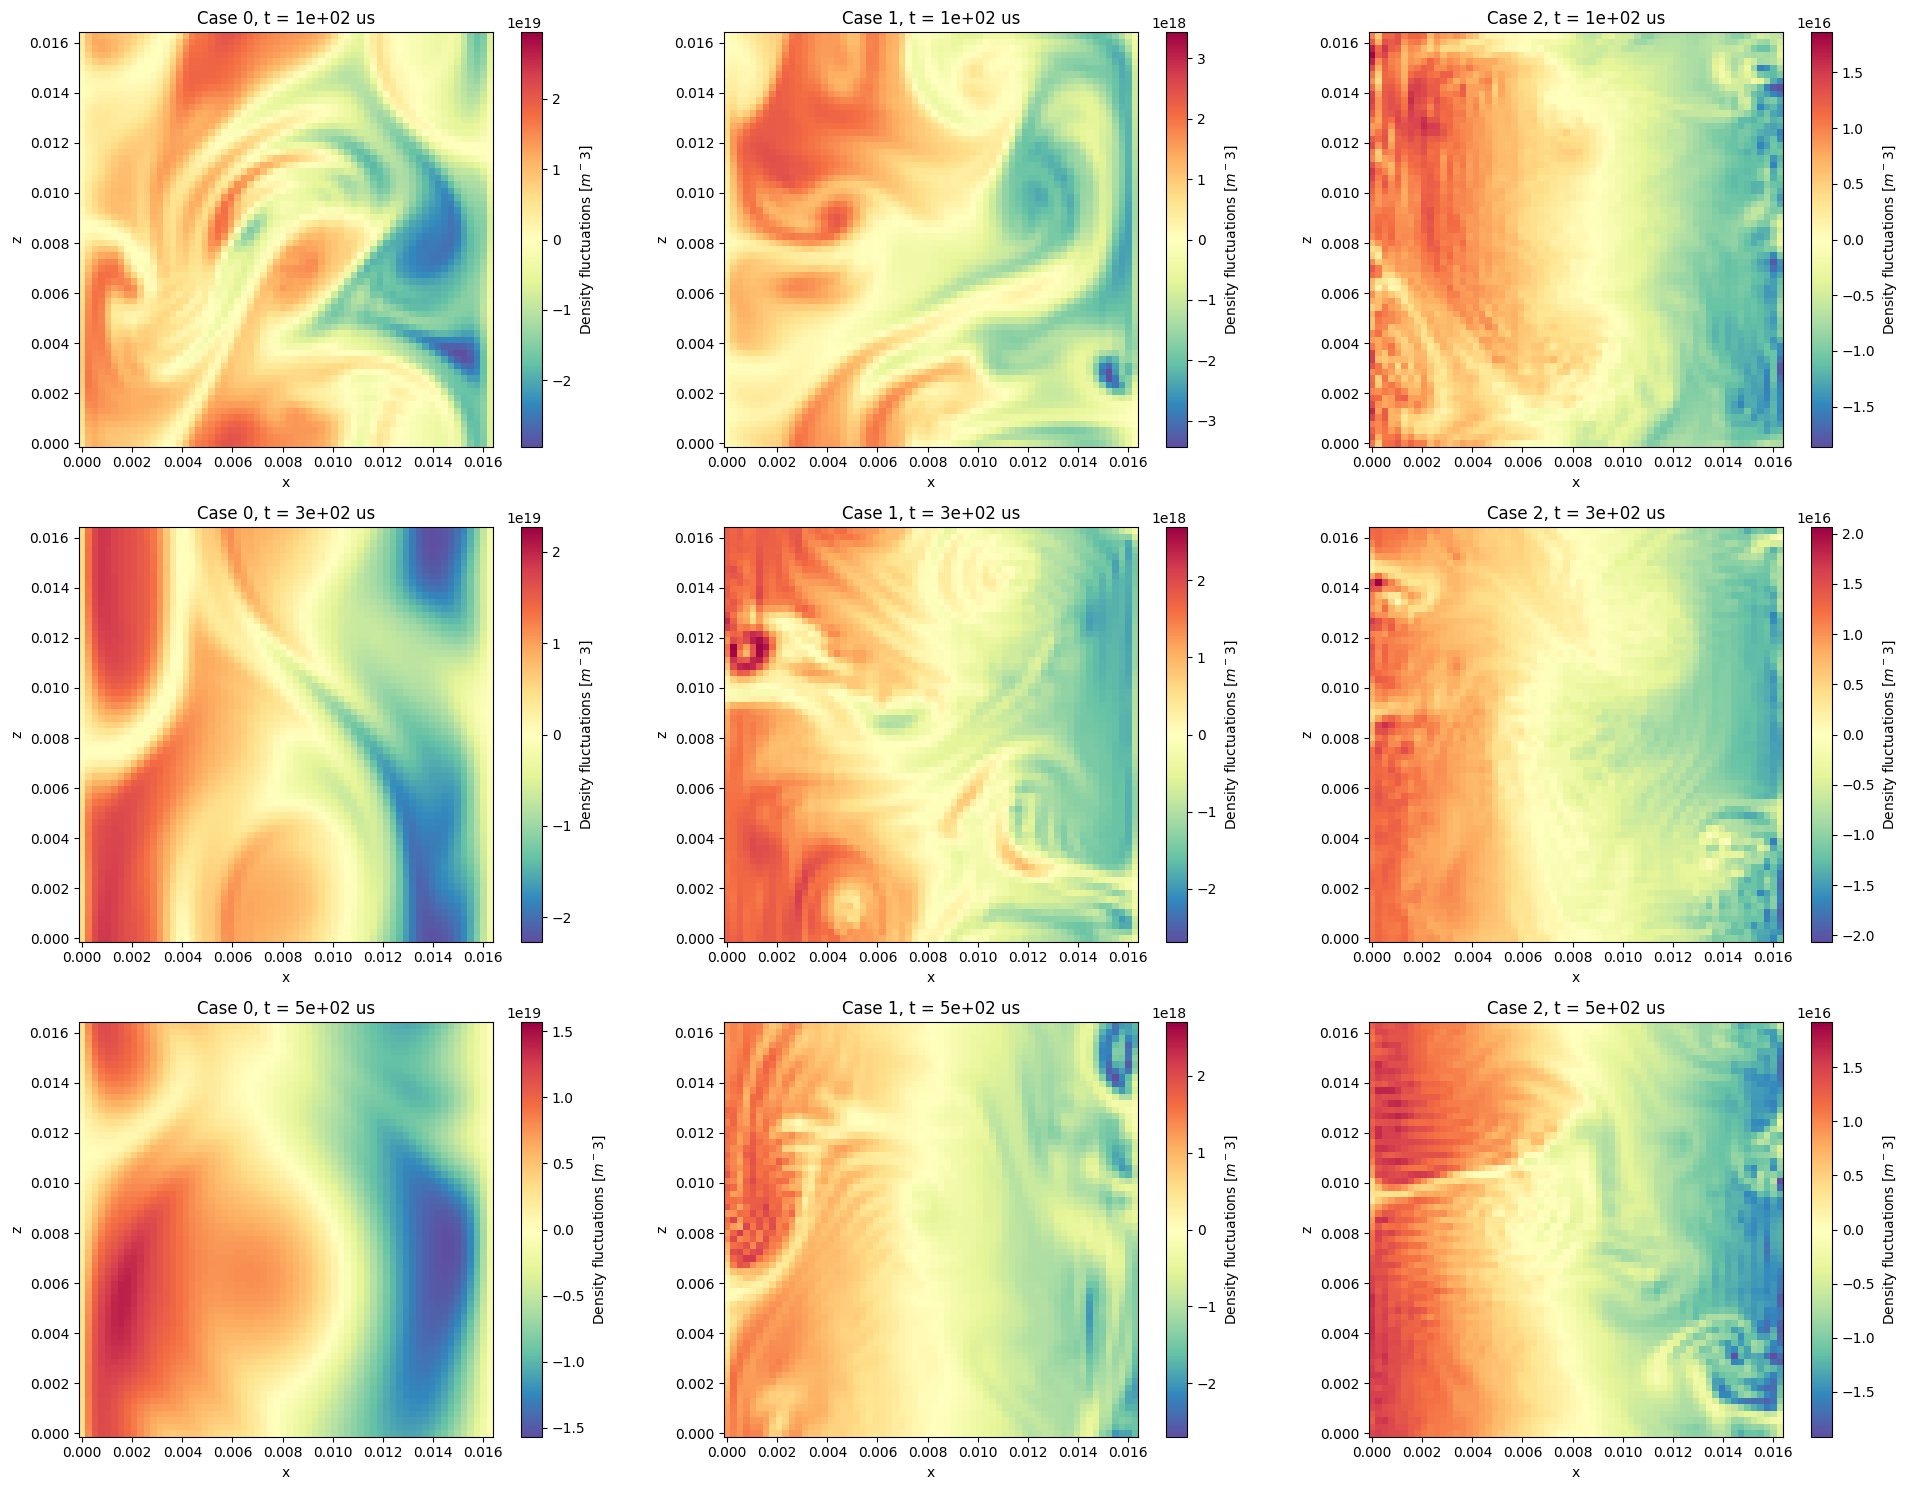

In [12]:

ncases = len(cases)
tsteps = np.linspace(100, 500, 3)
ntsteps = len(tsteps)

fig, axgrid = plt.subplots(len(tsteps), len(cases), figsize = (len(cases)*6.5, len(tsteps) * 5))

for ti, tstep in enumerate(tsteps):
    axes = axgrid[ti,:]
    
    for ci, name in enumerate(cases):
        ds = cases[name].ds.isel(y=32, t = int(tstep))
        
        
        ds["n"].plot(ax = axes[ci],  cmap = "Spectral_r", x = "x", y = "z", cbar_kwargs = dict(label = "Density fluctuations [$m^-3$]"))
        
        axes[ci].set_title(f"Case {ci}, t = {tstep:.0} us")
        axes[ci].set_aspect("equal")
        axes[ci].set_xlabel("x (radial) [m]")
        axes[ci].set_ylabel("z (binormal) [m]")

fig.tight_layout()
